## Análisis de datos

## Carga de librerías

In [1260]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from datetime import datetime
import numpy as np

## Carga de datos train.csv, mostrar primeras filas del dataset y el número de registros

In [1261]:
ruta_absoluta = os.path.abspath(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\playground-series-s4e9\train.csv')
print(ruta_absoluta)

X_train = pd.read_csv(ruta_absoluta)


# Mostrar las primeras filas del DataFrame
print(X_train.head(10))

# Mostrar el número de registros (filas) en el DataFrame X_train
num_registros = X_train.shape[0]
print(f"El número de registros es: {num_registros}")


C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\playground-series-s4e9\train.csv
   id          brand               model  model_year  milage      fuel_type  \
0   0           MINI       Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln               LS V8        2002  143250       Gasoline   
2   2      Chevrolet   Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis    G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz         Metris Base        2021    7388       Gasoline   
5   5           Audi       A6 2.0T Sport        2018   40950       Gasoline   
6   6           Audi           A8 L 3.0T        2016   62200       Gasoline   
7   7      Chevrolet  Silverado 1500 1LZ        2016  102604  E85 Flex Fuel   
8   8           Ford           F-150 XLT        2020   38352       Gasoline   
9   9            BMW             M4 Base        2015   74850       Gasoline   

       

## Carga de datos de test.csv, mostrar sus primeras líneas y el número de registros


In [1262]:
ruta_absoluta = os.path.abspath(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\playground-series-s4e9\test.csv')
print(ruta_absoluta)

X_test = pd.read_csv(ruta_absoluta)


# Mostrar las primeras filas del DataFrame
print(X_test.head())

# Mostrar el número de registros (filas) en el DataFrame X_train
num_registros = X_test.shape[0]
print(f"El número de registros es: {num_registros}")

C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\playground-series-s4e9\test.csv
       id brand                 model  model_year  milage fuel_type  \
0  188533  Land        Rover LR2 Base        2015   98000  Gasoline   
1  188534  Land     Rover Defender SE        2020    9142    Hybrid   
2  188535  Ford    Expedition Limited        2022   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport        2016   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus        2018   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/

## Revisar el número de columnas en ambos datasets

In [1263]:
# Verificar el número de columnas en ambos datasets
print(f"Train tiene {X_train.shape[1]} columnas.")
print(f"Test tiene {X_test.shape[1]} columnas.")


Train tiene 13 columnas.
Test tiene 12 columnas.


## Nos aseguramos de que los nombres de las columnas coincidan en ambos datasets y de que haya la misma cantidad de columnas

In [1264]:
# Verificar que los nombres de las columnas (features) sean los mismos
train_columns = X_train.columns
test_columns = X_test.columns

# Excluyendo la columna objetivo de train, si existe
train_columns = train_columns.drop('price', errors='ignore')

if all(train_columns == test_columns):
    print("Las columnas coinciden.")
else:
    print("Las columnas NO coinciden.")

Las columnas coinciden.


## Verificar el tipo de datos en cada columna en ambos datasets

In [1265]:
# Verificar los tipos de datos de cada columna en X_train
print(X_train.dtypes)

print(X_test.dtypes)


id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object
id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
dtype: object


## Ver nulos en X_train y en X_test

In [1266]:
print(X_train.isnull().sum())

print(X_test.isnull().sum())

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


## Cálculo de edad de los coches (añadir una columna llamada "age") a X_train

In [1267]:
# 1. Obtener el año actual
current_year = datetime.now().year

# 2. Calcular la edad del coche
X_train['age'] = current_year - X_train['model_year']

# 3. Opcional: Eliminar la columna original 'model_year' si ya no la necesitas
X_train = X_train.drop(columns=['model_year'])

# Mostrar las primeras filas del DataFrame con la nueva columna 'age'
print(X_train.head())

   id          brand              model  milage      fuel_type  \
0   0           MINI      Cooper S Base  213000       Gasoline   
1   1        Lincoln              LS V8  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4

## Cálculo de edad de los coches (añadir una columna llamada "age") a X_test

In [1268]:
# 1. Obtener el año actual
current_year = datetime.now().year

# 2. Calcular la edad del coche
X_test['age'] = current_year - X_test['model_year']

# 3. Opcional: Eliminar la columna original 'model_year' si ya no la necesitas
X_test = X_test.drop(columns=['model_year'])

# Mostrar las primeras filas del DataFrame con la nueva columna 'age'
print(X_test.head())

       id brand                 model  milage fuel_type  \
0  188533  Land        Rover LR2 Base   98000  Gasoline   
1  188534  Land     Rover Defender SE    9142    Hybrid   
2  188535  Ford    Expedition Limited   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

           ext_col int_col       accident clean_title  age  
0            White   Beige  None reported         Yes    9  
1           Silver   Black  None reported         Yes    4  
2    

## Eliminar columna ID de X_train y X_test

In [1269]:
X_train = X_train.drop(columns=['id'], errors='ignore')  # 'errors="ignore"' evita errores si 'id' no existe


X_test = X_test.drop(columns=['id'], errors='ignore')  # 'errors="ignore"' evita errores si 'id' no existe



## Estadísticas de X_train

In [1270]:
# Ver las estadísticas descriptivas de X_train
X_train_stats = X_train.drop(columns=['id'], errors='ignore')  
print(X_train_stats.describe())


              milage         price            age
count  188533.000000  1.885330e+05  188533.000000
mean    65705.295174  4.387802e+04       8.170002
std     49798.158076  7.881952e+04       5.660967
min       100.000000  2.000000e+03       0.000000
25%     24115.000000  1.700000e+04       4.000000
50%     57785.000000  3.082500e+04       7.000000
75%     95400.000000  4.990000e+04      11.000000
max    405000.000000  2.954083e+06      50.000000


## Dividir la columna "engine" en X_train

In [1271]:
import pandas as pd
import re

def extract_engine_info(engine_str):
    hp = re.search(r'(\d+(?:\.\d+)?)\s*HP', engine_str)
    size = re.search(r'(\d+(?:\.\d+)?)\s*L', engine_str)
    cylinders = re.search(r'(\d+)\s*Cylinder', engine_str)
    fuel = re.search(r'(Gasoline|Diesel|Electric|Hybrid)', engine_str, re.IGNORECASE)
    
    return {
        'extracted_horsepower': float(hp.group(1)) if hp else None,
        'extracted_engine_size': float(size.group(1)) if size else None,
        'extracted_cylinders': int(cylinders.group(1)) if cylinders else None,
        'extracted_fuel_type': fuel.group(1).lower() if fuel else None
    }

# Aplicar la función a la columna 'engine'
engine_info = X_train['engine'].apply(extract_engine_info)

# Convertir el resultado en nuevas columnas
new_columns = pd.DataFrame(engine_info.tolist())

# Unir las nuevas columnas al DataFrame original
X_train = pd.concat([X_train, new_columns], axis=1)

# Mostrar las primeras filas del DataFrame resultante
print(X_train[['engine', 'extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders', 'extracted_fuel_type', 'fuel_type']].head(20))

# Verificar cuántos valores nulos tenemos en cada nueva columna
print(X_train[['extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders', 'extracted_fuel_type']].isnull().sum())

# Verificar el porcentaje de valores nulos en cada nueva columna
null_percentage = X_train[['extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders', 'extracted_fuel_type']].isnull().mean() * 100
print(null_percentage)


                                               engine  extracted_horsepower  \
0        172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel                 172.0   
1        252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel                 252.0   
2   320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...                 320.0   
3        420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel                 420.0   
4        208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 208.0   
5        252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 252.0   
6       333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel                 333.0   
7   355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...                 355.0   
8                     2.7L V6 24V PDI DOHC Twin Turbo                   NaN   
9   425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...                 425.0   
10      312.0HP 3.6L V6 Cylinder Engine Gasoline Fuel                 312.0   
11                Electric Motor Electric Fuel Syste

## Dividir columna "engine" en X_test

In [1272]:
import pandas as pd
import re

def extract_engine_info(engine_str):
    hp = re.search(r'(\d+(?:\.\d+)?)\s*HP', engine_str)
    size = re.search(r'(\d+(?:\.\d+)?)\s*L', engine_str)
    cylinders = re.search(r'(\d+)\s*Cylinder', engine_str)
    fuel = re.search(r'(Gasoline|Diesel|Electric|Hybrid)', engine_str, re.IGNORECASE)
    
    return {
        'extracted_horsepower': float(hp.group(1)) if hp else None,
        'extracted_engine_size': float(size.group(1)) if size else None,
        'extracted_cylinders': int(cylinders.group(1)) if cylinders else None,
        'extracted_fuel_type': fuel.group(1).lower() if fuel else None
    }

# Aplicar la función a la columna 'engine'
engine_info = X_test['engine'].apply(extract_engine_info)

# Convertir el resultado en nuevas columnas
new_columns = pd.DataFrame(engine_info.tolist())

# Unir las nuevas columnas al DataFrame original
X_test = pd.concat([X_test, new_columns], axis=1)

# Mostrar las primeras filas del DataFrame resultante
print(X_test[['engine', 'extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders', 'extracted_fuel_type', 'fuel_type']].head(20))

# Verificar cuántos valores nulos tenemos en cada nueva columna
print(X_test[['extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders', 'extracted_fuel_type']].isnull().sum())

# Verificar el porcentaje de valores nulos en cada nueva columna
null_percentage = X_test[['extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders', 'extracted_fuel_type']].isnull().mean() * 100
print(null_percentage)


                                               engine  extracted_horsepower  \
0        240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 240.0   
1   395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...                 395.0   
2                     3.5L V6 24V PDI DOHC Twin Turbo                   NaN   
3                                      2.0 Liter TFSI                   NaN   
4        252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 252.0   
5        285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel                 285.0   
6       270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                 270.0   
7                                3.8L V6 24V GDI DOHC                   NaN   
8        536.0HP 5.5L 8 Cylinder Engine Gasoline Fuel                 536.0   
9       365.0HP 3.3L V6 Cylinder Engine Gasoline Fuel                 365.0   
10      303.0HP 3.7L V6 Cylinder Engine Gasoline Fuel                 303.0   
11       300.0HP 4.6L 8 Cylinder Engine Gasoline Fue

## EL símbolo "-" será rellenado con NaN

In [1273]:
X_train.replace('–', np.nan, inplace=True)

X_test.replace('–', np.nan, inplace=True)

## Valores nulos en fuel_type serán rellenados con los valores correspondientes de extracted_fuel_type en X_train

In [1274]:
# Rellenar los valores faltantes en 'fuel_type' con los valores de 'extracted_fuel_type'
X_train['fuel_type'] = X_train['fuel_type'].fillna(X_train['extracted_fuel_type'])

# Verificar si los valores faltantes fueron rellenados
print(X_train[['fuel_type', 'extracted_fuel_type']].head())

# Mostrar la cantidad de valores nulos por columna
print(X_train.isnull().sum())

# Opcional: Mostrar el porcentaje de valores nulos por columna
null_percentage = X_train.isnull().mean() * 100
print(null_percentage)



       fuel_type extracted_fuel_type
0       Gasoline            gasoline
1       Gasoline            gasoline
2  E85 Flex Fuel                None
3       Gasoline            gasoline
4       Gasoline            gasoline
brand                        0
model                        0
milage                       0
fuel_type                  952
engine                     925
transmission                87
ext_col                    366
int_col                   4527
accident                  2452
clean_title              21419
price                        0
age                          0
extracted_horsepower     33259
extracted_engine_size     6698
extracted_cylinders      37855
extracted_fuel_type      36714
dtype: int64
brand                     0.000000
model                     0.000000
milage                    0.000000
fuel_type                 0.504951
engine                    0.490630
transmission              0.046146
ext_col                   0.194130
int_col                 

## Valores nulos en fuel_type serán rellenados con los valores correspondientes de extracted_fuel_type en X_test

In [1275]:
# Rellenar los valores faltantes en 'fuel_type' con los valores de 'extracted_fuel_type'
X_test['fuel_type'] = X_test['fuel_type'].fillna(X_test['extracted_fuel_type'])

# Verificar si los valores faltantes fueron rellenados
print(X_test[['fuel_type', 'extracted_fuel_type']].head())

# Mostrar la cantidad de valores nulos por columna
print(X_test.isnull().sum())

# Opcional: Mostrar el porcentaje de valores nulos por columna
null_percentage = X_test.isnull().mean() * 100
print(null_percentage)


  fuel_type extracted_fuel_type
0  Gasoline            gasoline
1    Hybrid            gasoline
2  Gasoline                None
3  Gasoline                None
4  Gasoline            gasoline
brand                        0
model                        0
milage                       0
fuel_type                  637
engine                     617
transmission                40
ext_col                    223
int_col                   2953
accident                  1632
clean_title              14239
age                          0
extracted_horsepower     22181
extracted_engine_size     4380
extracted_cylinders      25150
extracted_fuel_type      24398
dtype: int64
brand                     0.000000
model                     0.000000
milage                    0.000000
fuel_type                 0.506802
engine                    0.490890
transmission              0.031824
ext_col                   0.177421
int_col                   2.349431
accident                  1.298433
clean_title    

## Verificar el número de nulos presentes en el dataset X_train y en X_test

In [1276]:
# Verificar el número de valores nulos en cada columna
print(X_train.isnull().sum())

print(X_test.isnull().sum())


brand                        0
model                        0
milage                       0
fuel_type                  952
engine                     925
transmission                87
ext_col                    366
int_col                   4527
accident                  2452
clean_title              21419
price                        0
age                          0
extracted_horsepower     33259
extracted_engine_size     6698
extracted_cylinders      37855
extracted_fuel_type      36714
dtype: int64
brand                        0
model                        0
milage                       0
fuel_type                  637
engine                     617
transmission                40
ext_col                    223
int_col                   2953
accident                  1632
clean_title              14239
age                          0
extracted_horsepower     22181
extracted_engine_size     4380
extracted_cylinders      25150
extracted_fuel_type      24398
dtype: int64


## Transformar el simbolo "-" a NaN

In [1277]:
#X_train.replace('–', np.nan, inplace=True)

#X_test.replace('–', np.nan, inplace=True)

## Verificar valores nulos

In [1278]:
# Verificar el número de valores nulos en cada columna
print(X_train.isnull().sum())

print(X_test.isnull().sum())

brand                        0
model                        0
milage                       0
fuel_type                  952
engine                     925
transmission                87
ext_col                    366
int_col                   4527
accident                  2452
clean_title              21419
price                        0
age                          0
extracted_horsepower     33259
extracted_engine_size     6698
extracted_cylinders      37855
extracted_fuel_type      36714
dtype: int64
brand                        0
model                        0
milage                       0
fuel_type                  637
engine                     617
transmission                40
ext_col                    223
int_col                   2953
accident                  1632
clean_title              14239
age                          0
extracted_horsepower     22181
extracted_engine_size     4380
extracted_cylinders      25150
extracted_fuel_type      24398
dtype: int64


## Rellenar los valores faltantes de las columnas 'fuel_type', 'extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders' con los valores correspondientes presentes en las columnas "brand" y "model" en X_train

In [1279]:
# Definir las columnas a rellenar
columnas_a_rellenar = ['fuel_type', 'extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders']

# Iterar sobre cada combinación de 'brand' y 'model'
for (brand, model), group in X_train.groupby(['brand', 'model']):
    # Para cada columna a rellenar
    for columna in columnas_a_rellenar:
        # Obtener los valores no faltantes (que no sean NaN)
        valores_no_faltantes = group[columna].dropna()

        # Si hay algún valor no faltante, usar el primero para reemplazar los faltantes
        if not valores_no_faltantes.empty:
            valor_a_usar = valores_no_faltantes.iloc[0]

            # Reemplazar los valores faltantes en la columna con el valor encontrado
            X_train.loc[(X_train['brand'] == brand) & (X_train['model'] == model) & 
                   (X_train[columna].isna()), columna] = valor_a_usar

# Verificar si los valores faltantes fueron rellenados
print(X_train[columnas_a_rellenar].isnull().sum())


fuel_type                  20
extracted_horsepower      801
extracted_engine_size    1194
extracted_cylinders      3716
dtype: int64


## Rellenar los valores faltantes de las columnas 'fuel_type', 'extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders' con los valores correspondientes presentes en las columnas "brand" y "model" en X_test

In [1280]:
# Definir las columnas a rellenar
columnas_a_rellenar = ['fuel_type', 'extracted_horsepower', 'extracted_engine_size', 'extracted_cylinders']

# Iterar sobre cada combinación de 'brand' y 'model'
for (brand, model), group in X_test.groupby(['brand', 'model']):
    # Para cada columna a rellenar
    for columna in columnas_a_rellenar:
        # Obtener los valores no faltantes (que no sean NaN)
        valores_no_faltantes = group[columna].dropna()

        # Si hay algún valor no faltante, usar el primero para reemplazar los faltantes
        if not valores_no_faltantes.empty:
            valor_a_usar = valores_no_faltantes.iloc[0]

            # Reemplazar los valores faltantes en la columna con el valor encontrado
            X_test.loc[(X_test['brand'] == brand) & (X_test['model'] == model) & 
                       (X_test[columna].isna()), columna] = valor_a_usar

# Verificar si los valores faltantes fueron rellenados
print(X_test[columnas_a_rellenar].isnull().sum())


fuel_type                  11
extracted_horsepower      783
extracted_engine_size    1766
extracted_cylinders      3682
dtype: int64


## Verificar valores nulos

In [1281]:
# Verificar el número de valores nulos en cada columna
print(X_train.isnull().sum())

print(X_test.isnull().sum())

brand                        0
model                        0
milage                       0
fuel_type                   20
engine                     925
transmission                87
ext_col                    366
int_col                   4527
accident                  2452
clean_title              21419
price                        0
age                          0
extracted_horsepower       801
extracted_engine_size     1194
extracted_cylinders       3716
extracted_fuel_type      36714
dtype: int64
brand                        0
model                        0
milage                       0
fuel_type                   11
engine                     617
transmission                40
ext_col                    223
int_col                   2953
accident                  1632
clean_title              14239
age                          0
extracted_horsepower       783
extracted_engine_size     1766
extracted_cylinders       3682
extracted_fuel_type      24398
dtype: int64


## Eliminar las columnas "extracted_fuel_type" y "engine" de X_train y X_test

In [1282]:
# Eliminar las columnas 'extracted_fuel_type' y 'engine' de X_train
X_train.drop(['extracted_fuel_type', 'engine'], axis=1, inplace=True)

# Eliminar las columnas 'extracted_fuel_type' y 'engine' de X_test
X_test.drop(['extracted_fuel_type', 'engine'], axis=1, inplace=True)


## Graficar histogramas, gráficos de caja y matriz de correlación de X_train_cleaned

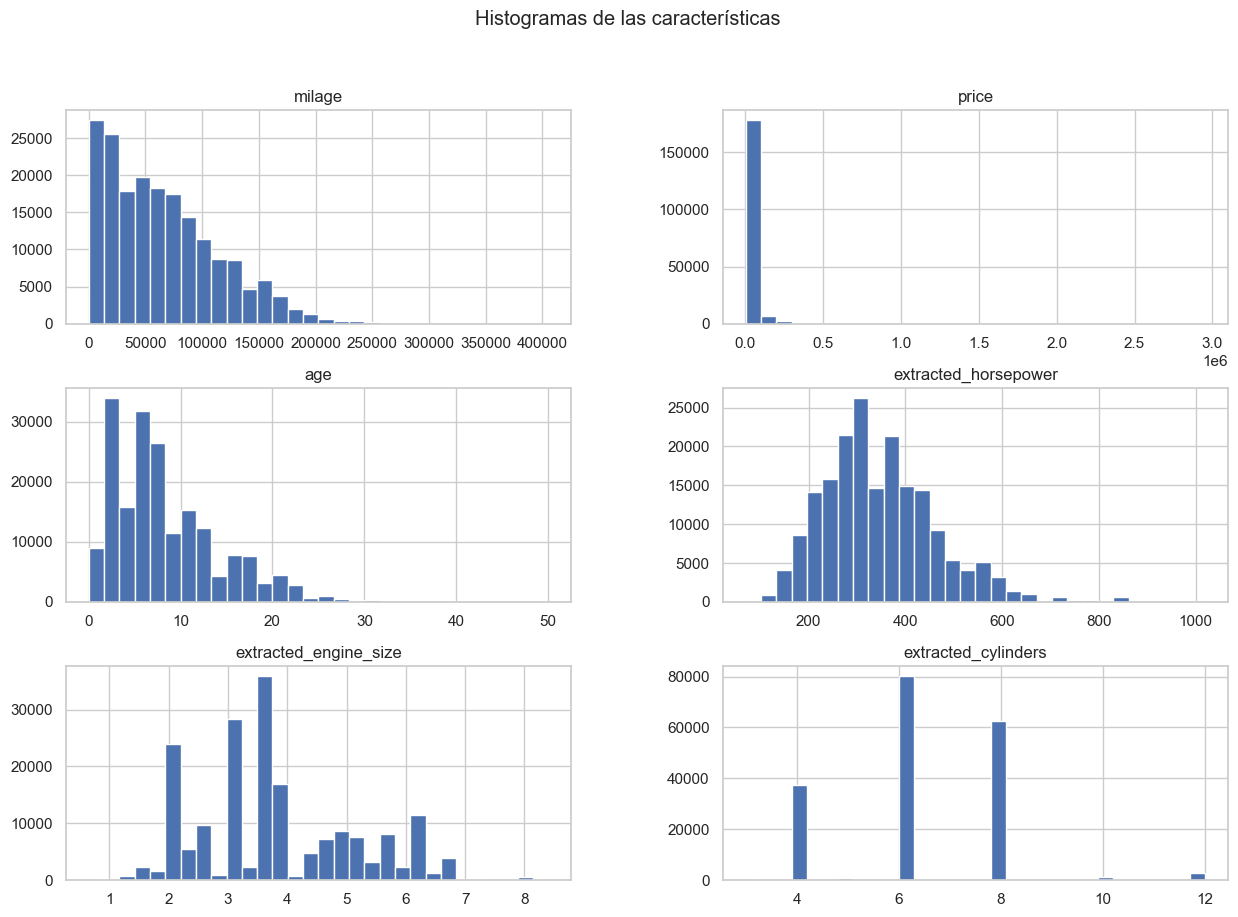

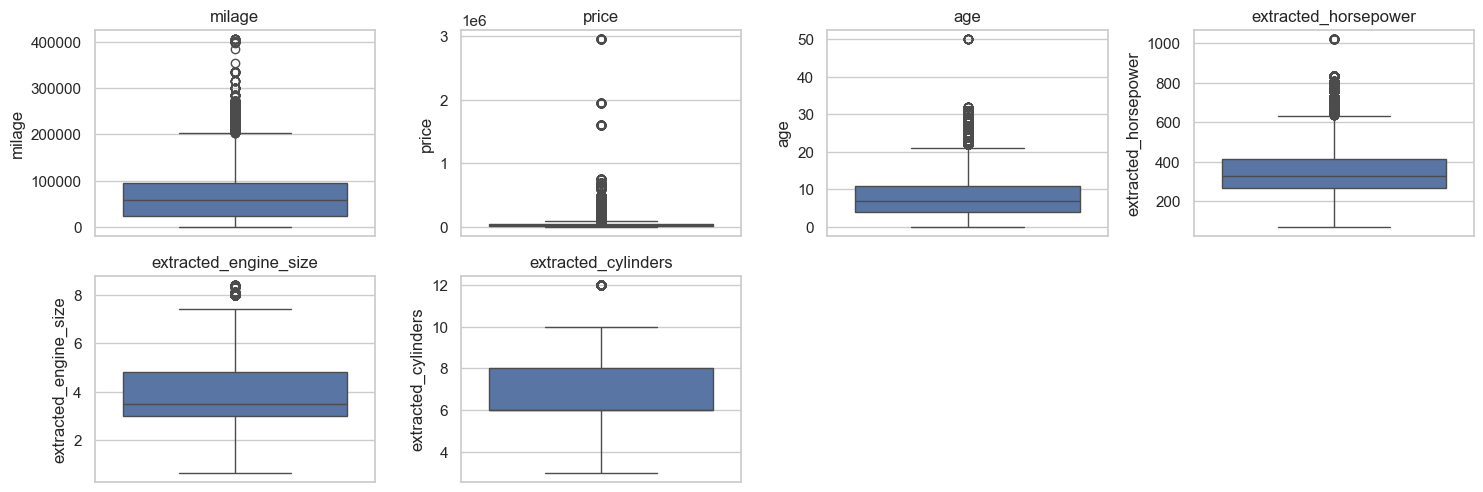

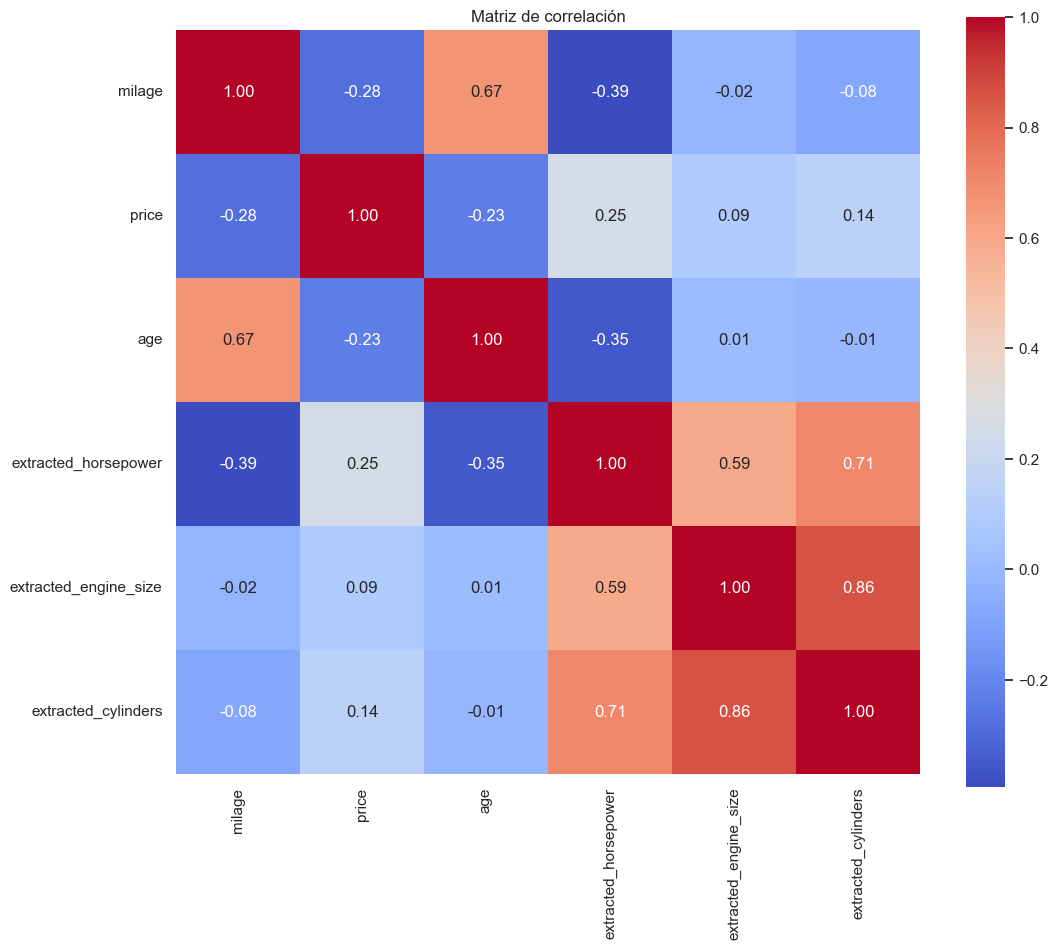

In [1283]:
# Establecer el estilo de seaborn
sns.set(style='whitegrid')

# Eliminar la columna 'PassengerId' del DataFrame
X_train = X_train.drop(columns=['id'], errors='ignore')

# 1. Histogramas
def plot_histograms(X_train):
    numeric_data = X_train.select_dtypes(include=['float64', 'int64'])
    numeric_data.hist(bins=30, figsize=(15, 10))
    plt.suptitle('Histogramas de las características')
    plt.show()

plot_histograms(X_train)

# 2. Gráficos de caja para detectar valores atípicos
def box_plots(X_train):
    plt.figure(figsize=(15, 10))
    numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(y=X_train[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

box_plots(X_train)

# 3. Matriz de correlación
def correlation_heatmap(X_train):
    numeric_data = X_train.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 10))
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Matriz de correlación')
    plt.show()

correlation_heatmap(X_train)


## Eliminar la columna "extracted_cylinders" en X_train y X_test porque tiene una alta correlación

In [1284]:
# Eliminar la columna 'extracted_cylinders' de X_train
X_train.drop('extracted_cylinders', axis=1, inplace=True)

# Eliminar la columna 'extracted_cylinders' de X_test
X_test.drop('extracted_cylinders', axis=1, inplace=True)


## Identificar los outliers

In [1285]:
def count_outliers_iqr(X_train, column):
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Contar los outliers
    outlier_count = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)].shape[0]
    return outlier_count

# Contar outliers en cada columna
outliers_model_year_count = count_outliers_iqr(X_train, 'age')
outliers_mileage_count = count_outliers_iqr(X_train, 'milage')
outliers_price_count = count_outliers_iqr(X_train, 'price')

# Mostrar el conteo de outliers
print(f"Número de outliers en age: {outliers_model_year_count}")
print(f"Número de outliers en milage: {outliers_mileage_count}")
print(f"Número de outliers en price: {outliers_price_count}")




Número de outliers en age: 5132
Número de outliers en milage: 1766
Número de outliers en price: 10880


## Verificación de frecuencias de cada categoría

In [1286]:
# Mostrar frecuencias de cada columna categórica antes de la agrupación
for column in X_train.select_dtypes(include=['object']).columns:
    print(f'Frecuencias para la columna {column}:')
    print(X_train[column].value_counts())
    print("\n")


Frecuencias para la columna brand:
brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren         

## Dividir la columna de transmisión entre "automaticos" y "no automáticos" para simplificar la sobrerrepresentación en X_train

In [1287]:
columns = X_train.columns
n_values = [X_train[a].unique() for a in X_train.columns]

cuenta = pd.DataFrame()
cuenta['features'] = columns
cuenta['n_values'] = n_values

# Para acceder al valor en la posición [7, 1]
transmission_list = cuenta.iloc[7, 1]



X_train_t = pd.DataFrame(transmission_list, columns=['transmission'])

def assign_transmission_type(transmission):
    if isinstance(transmission, str) and ('automatic' in transmission.lower() or 'a/t' in transmission.lower()):
        return 0  # Transmisión automática
    else:
        return 1  # Resto de transmisiones

X_train['transmission_type'] = X_train['transmission'].apply(assign_transmission_type)

## Dividir la columna de transmisión entre "automaticos" y "no automáticos" para simplificar la sobrerrepresentación en X_test

In [1288]:
# Extraer las columnas y los valores únicos de X_test
columns = X_test.columns
n_values = [X_test[a].unique() for a in X_test.columns]

# Crear un DataFrame con las características y sus valores únicos
cuenta = pd.DataFrame()
cuenta['features'] = columns
cuenta['n_values'] = n_values

# Para acceder al valor en la posición [7, 1] del DataFrame cuenta
transmission_list = cuenta.iloc[7, 1]

# Crear un DataFrame con los valores de 'transmission'
X_test_t = pd.DataFrame(transmission_list, columns=['transmission'])

# Definir una función para asignar el tipo de transmisión
def assign_transmission_type(transmission):
    if isinstance(transmission, str) and ('automatic' in transmission.lower() or 'a/t' in transmission.lower()):
        return 0  # Transmisión automática
    else:
        return 1  # Resto de transmisiones

# Aplicar la función al DataFrame X_test y crear una nueva columna 'transmission_type'
X_test['transmission_type'] = X_test['transmission'].apply(assign_transmission_type)


## Calcular valores nulos en X_train y X_test

In [1289]:
X_train.isnull().sum()
X_test.isnull().sum()

brand                        0
model                        0
milage                       0
fuel_type                   11
transmission                40
ext_col                    223
int_col                   2953
accident                  1632
clean_title              14239
age                          0
extracted_horsepower       783
extracted_engine_size     1766
transmission_type            0
dtype: int64

 ## Agrupar marcas de coches menos frecuentes en la columna "brand" en X_train

In [1290]:
# Contar frecuencias
brand_counts = X_train['brand'].value_counts()

# Establecer un umbral para conservar las marcas
threshold = 1000  # Cambia esto según tus necesidades
top_brands = brand_counts[brand_counts > threshold].index

# Reemplazar las marcas menos frecuentes por 'Otras'
X_train['brand'] = X_train['brand'].where(X_train['brand'].isin(top_brands), 'Otras')

# Verificar la nueva frecuencia
print(X_train['brand'].value_counts())



brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Otras             9953
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Name: count, dtype: int64


 ## Agrupar marcas de coches menos frecuentes en la columna "brand" en X_test

In [1291]:


# Contar frecuencias
brand_counts = X_test['brand'].value_counts()

# Establecer un umbral para conservar las marcas
threshold = 1000  # Cambia esto según tus necesidades
top_brands = brand_counts[brand_counts > threshold].index

# Reemplazar las marcas menos frecuentes por 'Otras'
X_test['brand'] = X_test['brand'].where(X_test['brand'].isin(top_brands), 'Otras')

# Verifica la nueva frecuencia
print(X_test['brand'].value_counts())


brand
Ford             15265
Mercedes-Benz    12875
BMW              11286
Chevrolet        10698
Otras             9153
Audi              7289
Porsche           7153
Land              6348
Toyota            6084
Lexus             5729
Jeep              4412
Cadillac          3059
RAM               2753
Nissan            2674
Tesla             2387
INFINITI          2123
GMC               2094
Dodge             2071
Mazda             1770
Kia               1750
Lincoln           1593
Subaru            1591
Acura             1567
Honda             1436
Hyundai           1308
Volkswagen        1222
Name: count, dtype: int64


## Eliminar la columna "clean_title" y "age" de X_train y X_test. "Age" la elimino porque tiene una correlación muy alta con "milage". "Clean_type" la elimino porque no aporta información.

In [1292]:
# Eliminar las columnas 'clean_title' y 'age' de X_train_cleaned y X_test_cleaned
X_train_cleaned = X_train.drop(columns=['clean_title'], errors='ignore')
X_test_cleaned = X_test.drop(columns=['clean_title'], errors='ignore')

# Verificar que las columnas hayan sido eliminadas
print("Columnas en X_train_cleaned:", X_train_cleaned.columns)
print("Columnas en X_test_cleaned:", X_test_cleaned.columns)


Columnas en X_train_cleaned: Index(['brand', 'model', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'accident', 'price', 'age', 'extracted_horsepower',
       'extracted_engine_size', 'transmission_type'],
      dtype='object')
Columnas en X_test_cleaned: Index(['brand', 'model', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'accident', 'age', 'extracted_horsepower',
       'extracted_engine_size', 'transmission_type'],
      dtype='object')


## Reemplazar valores nulos en el dataset X_train_cleaned con la media para los valores numéricos y la moda para las variables categóricas

In [1293]:
# Para columnas numéricas: reemplazar NaN con la media
numerical_cols = X_train_cleaned.select_dtypes(include=['float64', 'int64']).columns
X_train_cleaned[numerical_cols] = X_train_cleaned[numerical_cols].fillna(X_train_cleaned[numerical_cols].mean())

# Para columnas categóricas: reemplazar NaN con la moda
categorical_cols = X_train_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    moda = X_train_cleaned[col].mode()[0]  # Obtener la moda
    X_train_cleaned[col] = X_train_cleaned[col].fillna(moda)  # Reemplazar NaN con la moda

# Verificar si hay valores nulos restantes
print(X_train_cleaned.isnull().sum())


brand                    0
model                    0
milage                   0
fuel_type                0
transmission             0
ext_col                  0
int_col                  0
accident                 0
price                    0
age                      0
extracted_horsepower     0
extracted_engine_size    0
transmission_type        0
dtype: int64


## Reemplazar valores nulos en el dataset X_test_cleaned con la media para los valores numéricos y la moda para las variables categóricas

In [1294]:
# Para columnas numéricas: reemplazar NaN con la media
numerical_cols = X_test_cleaned.select_dtypes(include=['float64', 'int64']).columns
X_test_cleaned[numerical_cols] = X_test_cleaned[numerical_cols].fillna(X_test_cleaned[numerical_cols].mean())

# Para columnas categóricas: reemplazar NaN con la moda
categorical_cols = X_test_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    moda = X_test_cleaned[col].mode()[0]  # Obtener la moda
    X_test_cleaned[col] = X_test_cleaned[col].fillna(moda)  # Reemplazar NaN con la moda

# Verificar si hay valores nulos restantes
print(X_test_cleaned.isnull().sum())



brand                    0
model                    0
milage                   0
fuel_type                0
transmission             0
ext_col                  0
int_col                  0
accident                 0
age                      0
extracted_horsepower     0
extracted_engine_size    0
transmission_type        0
dtype: int64


## Verificar de nuevo los valores nulos o NaN

In [1295]:
print(X_train_cleaned.isnull().sum())
print(X_test_cleaned.isnull().sum())


brand                    0
model                    0
milage                   0
fuel_type                0
transmission             0
ext_col                  0
int_col                  0
accident                 0
price                    0
age                      0
extracted_horsepower     0
extracted_engine_size    0
transmission_type        0
dtype: int64
brand                    0
model                    0
milage                   0
fuel_type                0
transmission             0
ext_col                  0
int_col                  0
accident                 0
age                      0
extracted_horsepower     0
extracted_engine_size    0
transmission_type        0
dtype: int64


## Encoding de X_train_cleaned label encoding

In [1296]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Verifica las columnas disponibles
print("Columnas en X_train_cleaned:", X_train_cleaned.columns.tolist())

# Genera la lista de columnas categóricas
categorical_columns = [col for col in X_train_cleaned.columns if X_train_cleaned[col].dtype == 'object']

# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a cada columna categórica individualmente
for col in categorical_columns:
    X_train_cleaned[col] = label_encoder.fit_transform(X_train_cleaned[col])

# Mostrar las primeras filas del DataFrame codificado
print(X_train_cleaned.head())







Columnas en X_train_cleaned: ['brand', 'model', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'price', 'age', 'extracted_horsepower', 'extracted_engine_size', 'transmission_type']
   brand  model  milage  fuel_type  transmission  ext_col  int_col  accident  \
0     18    495  213000          2            38      312       71         1   
1     17    930  143250          2            38      263       10         0   
2      5   1575  136731          1            38       38       71         1   
3     22    758   19500          2            49       29       14         1   
4     20   1077    7388          2            23       29       10         1   

   price  age  extracted_horsepower  extracted_engine_size  transmission_type  
0   4200   17                 172.0                    1.6                  0  
1   4999   22                 252.0                    3.9                  0  
2  13900   22                 320.0                    5.3              

## Encoding de X_test_cleaned con label encoder.

In [1297]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Verifica las columnas disponibles
print("Columnas en X_test_cleaned:", X_test_cleaned.columns.tolist())

# Genera la lista de columnas categóricas
categorical_columns = [col for col in X_test_cleaned.columns if X_test_cleaned[col].dtype == 'object']

# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a cada columna categórica individualmente
for col in categorical_columns:
    X_test_cleaned[col] = label_encoder.fit_transform(X_test_cleaned[col])

# Mostrar las primeras filas del DataFrame codificado
print(X_test_cleaned.head())





Columnas en X_test_cleaned: ['brand', 'model', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'age', 'extracted_horsepower', 'extracted_engine_size', 'transmission_type']
   brand  model  milage  fuel_type  transmission  ext_col  int_col  accident  \
0     13   1388   98000          2            16      302       10         1   
1     13   1375    9142          3            31      261       14         1   
2      6    636   28121          2             3      302       57         1   
3      1    182   61258          2            39      259       14         1   
4      1    181   59000          2            38      127       14         1   

   age  extracted_horsepower  extracted_engine_size  transmission_type  
0    9                 240.0                    2.0                  0  
1    4                 395.0                    3.0                  0  
2    2                 375.0                    3.5                  0  
3    8                 252.0  

## Estandarizar variables numéricas en X_train

In [1298]:
from sklearn.preprocessing import StandardScaler

# 1. Eliminar la columna 'id' si existe
X_train_cleaned = X_train_cleaned.drop(columns=['id'], errors='ignore')

# 2. Seleccionar las columnas numéricas a estandarizar, excluyendo 'price'
numeric_columns = X_train_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Excluir la columna 'price' de la lista de columnas a estandarizar
numeric_columns.remove('price')

# 3. Inicializar el escalador
scaler = StandardScaler()

# 4. Estandarizar las columnas numéricas, excepto 'price'
X_train_cleaned[numeric_columns] = scaler.fit_transform(X_train_cleaned[numeric_columns])

# Mostrar las primeras filas del DataFrame estandarizado
print(X_train_cleaned.head())



      brand     model    milage  fuel_type  transmission   ext_col   int_col  \
0  0.598002 -0.713392  2.957842  -0.101378      0.641293  1.355673  1.117717   
1  0.480451  0.120255  1.557184  -0.101378      0.641293  0.927742 -0.613244   
2 -0.930160  1.356353  1.426276  -1.411216      0.641293 -1.037247  1.117717   
3  1.068206 -0.209371 -0.927854  -0.101378      1.487409 -1.115847 -0.499738   
4  0.833104  0.401970 -1.171076  -0.101378     -0.512503 -1.115847 -0.613244   

   accident  price       age  extracted_horsepower  extracted_engine_size  \
0  0.531822   4200  1.559808             -1.496721              -1.603703   
1 -1.880330   4999  2.443052             -0.803060               0.083989   
2  0.531822  13900  2.443052             -0.213448               1.111279   
3  0.531822  45000 -0.206679              0.653628               0.891146   
4  0.531822  97500 -0.913274             -1.184573              -1.310191   

   transmission_type  
0          -0.504342  
1         

## Estandarizar X_test_cleaned

In [1300]:
from sklearn.preprocessing import StandardScaler

# 1. Eliminar la columna 'id' si existe
X_test_cleaned = X_test_cleaned.drop(columns=['id'], errors='ignore')

# 2. Seleccionar las columnas numéricas a estandarizar, excluyendo 'price'
numeric_columns = X_test_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Excluir la columna 'price' de la lista de columnas a estandarizar


# 3. Inicializar el escalador
scaler = StandardScaler()

# 4. Estandarizar las columnas numéricas, excepto 'price'
X_test_cleaned[numeric_columns] = scaler.fit_transform(X_test_cleaned[numeric_columns])

# Mostrar las primeras filas del DataFrame estandarizado
print(X_test_cleaned.head())




      brand     model    milage  fuel_type  transmission   ext_col   int_col  \
0  0.211008  1.001794  0.636302  -0.102818     -1.049137  1.288616 -0.613814   
1  0.211008  0.976865 -1.132944   1.199524      0.104033  0.927500 -0.500395   
2 -0.725140 -0.440257 -0.755054  -0.102818     -2.048551  1.288616  0.718869   
3 -1.393817 -1.310856 -0.095265  -0.102818      0.719057  0.909884 -0.500395   
4 -1.393817 -1.312774 -0.140224  -0.102818      0.642179 -0.252735 -0.500395   

   accident       age  extracted_horsepower  extracted_engine_size  \
0  0.532848  0.140564             -0.910676              -1.318377   
1  0.532848 -0.740684              0.445808              -0.581326   
2  0.532848 -1.093183              0.270777              -0.212801   
3  0.532848 -0.035686             -0.805658              -1.318377   
4  0.532848 -0.388185             -0.805658              -1.318377   

   transmission_type  
0           -0.50318  
1           -0.50318  
2           -0.50318  
3     

## Separación de la variable objetivo del dataset X_train_cleaned

In [1301]:
# 1. Separar la variable objetivo 'price'
y_train = X_train_cleaned['price']

# 2. Eliminar la variable objetivo del conjunto de características
X_train_features = X_train_cleaned.drop(columns=['price'])

# Mostrar las primeras filas de las características y la variable objetivo
print("Características (X_train_features):")
print(X_train_features.head())
print("\nVariable objetivo (y_train):")
print(y_train.head())
print(X_test_cleaned.head())

Características (X_train_features):
      brand     model    milage  fuel_type  transmission   ext_col   int_col  \
0  0.598002 -0.713392  2.957842  -0.101378      0.641293  1.355673  1.117717   
1  0.480451  0.120255  1.557184  -0.101378      0.641293  0.927742 -0.613244   
2 -0.930160  1.356353  1.426276  -1.411216      0.641293 -1.037247  1.117717   
3  1.068206 -0.209371 -0.927854  -0.101378      1.487409 -1.115847 -0.499738   
4  0.833104  0.401970 -1.171076  -0.101378     -0.512503 -1.115847 -0.613244   

   accident       age  extracted_horsepower  extracted_engine_size  \
0  0.531822  1.559808             -1.496721              -1.603703   
1 -1.880330  2.443052             -0.803060               0.083989   
2  0.531822  2.443052             -0.213448               1.111279   
3  0.531822 -0.206679              0.653628               0.891146   
4  0.531822 -0.913274             -1.184573              -1.310191   

   transmission_type  
0          -0.504342  
1          -0.50

## Guardar los datasets X_train_features y_train y X_test en formato csv

In [1302]:
# Guardar X_train_features en un archivo CSV
X_train_features.to_csv(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\X_train_features5.csv', index=False)

# Guardar y_train en un archivo CSV
y_train.to_csv(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\y_train5.csv', index=False)

print("Los datasets se han guardado como 'X_train_features5.csv' y 'y_train5.csv'.")



# Renombrar X_test a X_test_cleaned
X_test_cleaned = X_test_cleaned.copy()  # Hacer una copia si es necesario

# Guardar X_test_clean en un archivo CSV
X_test_cleaned.to_csv(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\X_test_clean5.csv', index=False)

print("El dataset se ha guardado como 'X_test_clean5.csv'.")

print(X_test_cleaned.head())



Los datasets se han guardado como 'X_train_features5.csv' y 'y_train5.csv'.
El dataset se ha guardado como 'X_test_clean5.csv'.
      brand     model    milage  fuel_type  transmission   ext_col   int_col  \
0  0.211008  1.001794  0.636302  -0.102818     -1.049137  1.288616 -0.613814   
1  0.211008  0.976865 -1.132944   1.199524      0.104033  0.927500 -0.500395   
2 -0.725140 -0.440257 -0.755054  -0.102818     -2.048551  1.288616  0.718869   
3 -1.393817 -1.310856 -0.095265  -0.102818      0.719057  0.909884 -0.500395   
4 -1.393817 -1.312774 -0.140224  -0.102818      0.642179 -0.252735 -0.500395   

   accident       age  extracted_horsepower  extracted_engine_size  \
0  0.532848  0.140564             -0.910676              -1.318377   
1  0.532848 -0.740684              0.445808              -0.581326   
2  0.532848 -1.093183              0.270777              -0.212801   
3  0.532848 -0.035686             -0.805658              -1.318377   
4  0.532848 -0.388185             -0.8056